In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv('dataset/adult.data',names=columns, na_values='?')
df.head(10)

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.dtypes

age                int64
workClass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [6]:
df.isnull().sum()

age               0
workClass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
df.nunique()

age                  73
workClass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
df['workClass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workClass, dtype: int64

In [10]:
df['workClass'] = df['workClass'].replace(' ?', ' Private')

In [11]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df['occupation'] = df['occupation'].replace(' ?', ' Prof-specialty')

In [13]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [14]:
df['native-country'] = df['native-country'].replace(' ?', ' United-States')

In [15]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [16]:
# education Category
df.education= df.education.replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], 'school')
df.education = df.education.replace(' HS-grad', 'high school')
df.education = df.education.replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'higher')
df.education = df.education.replace(' Bachelors', 'grad')
df.education = df.education.replace(' Masters', 'postgrad')
df.education = df.education.replace(' Doctorate', 'doc')

In [17]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

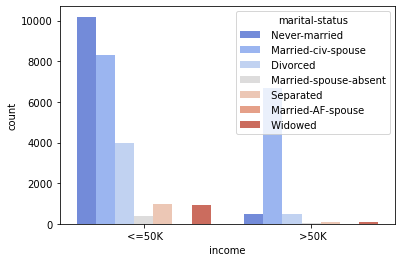

In [18]:
sns.countplot(x=df['income'], data=df, palette='coolwarm', hue='marital-status');

In [19]:
#martial status
df['marital-status']= df['marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'married')
df['marital-status']= df['marital-status'].replace([' Never-married'], 'unmarried')
df['marital-status']= df['marital-status'].replace([' Divorced', ' Separated',' Widowed',' Married-spouse-absent'], 'other')
df['marital-status'].value_counts()

married      14999
unmarried    10683
other         6879
Name: marital-status, dtype: int64

In [20]:
# income
df.income = df.income.replace(' <=50K', 0)
df.income = df.income.replace(' >50K', 1)
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [21]:
df.head(5)

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,grad,13,unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,grad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,high school,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,grad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [22]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


In [23]:
del df['education-num']
del df['fnlwgt']

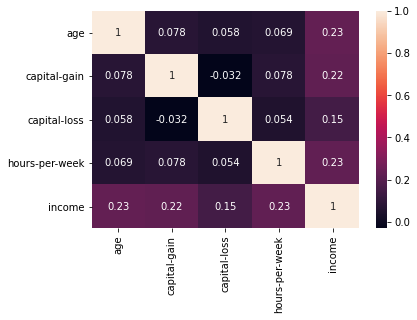

In [24]:
sns.heatmap(df.corr(), annot=True);

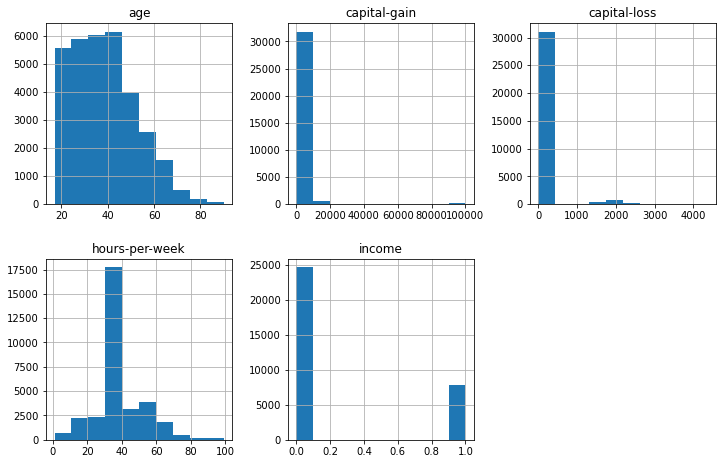

In [25]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

In [26]:
df['education'].value_counts()

high school    10501
higher         10316
grad            5355
school          4253
postgrad        1723
doc              413
Name: education, dtype: int64

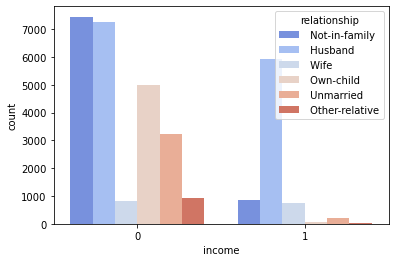

In [27]:
sns.countplot(x=df['income'], palette='coolwarm', hue='relationship', data=df);

In [28]:
# X= df.drop(['income'], axis=1)
# y = df['income']
from sklearn.preprocessing import StandardScaler, LabelEncoder
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()
# X= df.drop(['income'], axis=1)
# y = df['income']
from sklearn.preprocessing import StandardScaler, LabelEncoder
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()


,age,workClass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,1,2,0,1,4,1,25,0,39,38,0
1,33,5,1,0,3,0,4,1,0,0,12,38,0
2,21,3,2,1,5,1,4,1,0,0,39,38,0
3,36,3,5,0,5,0,2,1,0,0,39,38,0
4,11,3,1,0,9,5,2,0,0,0,39,4,0


In [30]:
df1['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [ ]:
24720/7841

In [29]:
# ss= StandardScaler().fit(df1.drop('income', axis=1))
# X= ss.transform(df1.drop('income', axis=1))
# y= df['income']
# df2 = pd.DataFrame(X, columns = ['age','workClass','education','marital-status','occupation','relationship','race',
#                                         'sex','capital-gain','capital-loss','hours-per-week','native-country'])
# df3= df2.join(y)
# df3.head()

# count_class_0, count_class_1 = df3['income'].value_counts()
# df_class_0 = df3[df3['income'] == 0]
# df_class_1 = df3[df3['income'] == 1]

In [32]:
# Class count
count_class_0, count_class_1 = df1['income'].value_counts()

# Divide by class
df_class_0 = df1[df1['income'] == 0]
df_class_1 = df1[df1['income'] == 1]

In [33]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df4 = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df4.income.value_counts())
df4.head()

Random under-sampling:
1    7841
0    7841
Name: income, dtype: int64


,age,workClass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
18205,18,3,3,2,11,1,4,1,0,0,39,38,0
31606,8,3,2,1,2,1,4,1,0,0,39,38,0
4308,18,5,2,0,4,0,4,1,0,0,93,38,0
18233,28,3,3,1,12,4,4,0,0,0,39,38,0
9362,10,1,2,2,4,3,4,1,0,0,39,38,0


In [34]:
df4.reset_index(inplace=True)
df4.head()

,index,age,workClass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,18205,18,3,3,2,11,1,4,1,0,0,39,38,0
1,31606,8,3,2,1,2,1,4,1,0,0,39,38,0
2,4308,18,5,2,0,4,0,4,1,0,0,93,38,0
3,18233,28,3,3,1,12,4,4,0,0,0,39,38,0
4,9362,10,1,2,2,4,3,4,1,0,0,39,38,0


In [35]:
del df4["index"]
df4.head()

,age,workClass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,18,3,3,2,11,1,4,1,0,0,39,38,0
1,8,3,2,1,2,1,4,1,0,0,39,38,0
2,18,5,2,0,4,0,4,1,0,0,93,38,0
3,28,3,3,1,12,4,4,0,0,0,39,38,0
4,10,1,2,2,4,3,4,1,0,0,39,38,0


In [36]:
# from sklearn import preprocessing
X2 = df4.iloc[:, 0:12].values
y2 = df4.iloc[:, [12]].values
print(len(X2))
# print(y2[:10])
## Normalizing data - Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# X2 = preprocessing.scale(X2)
from sklearn.model_selection import train_test_split
feature_train, feature_test, labels_train, labels_test = train_test_split(X2, y2, random_state = 42,stratify=y2)
print ("Train:%d +  Test:%d = Total:%d"  % (len(feature_train),len(feature_test),len(feature_train)+len(feature_test)))

15682
Train:11761 +  Test:3921 = Total:15682


In [37]:
print((labels_train == 0).sum())
print((labels_train == 1).sum())

5880
5881


In [38]:
feature_test, feature_val, labels_test, labels_val = train_test_split(feature_test, labels_test, random_state = 42,stratify=labels_test)
print ("Test:%d +  Val:%d = Total:%d"  % (len(feature_test),len(feature_val),len(feature_test)+len(feature_val)))

Test:2940 +  Val:981 = Total:3921


In [39]:
print(feature_train[0])
print(feature_train.shape)

[26  3  4  0  3  0  4  1 94  0 52 38]
(11761, 12)


In [40]:
print(feature_train[0])

[26  3  4  0  3  0  4  1 94  0 52 38]


In [41]:
output_df=pd.DataFrame(feature_train,columns = ['age','workClass','education','marital-status','occupation','relationship','race',
                                        'sex','capital-gain','capital-loss','hours-per-week','native-country'])
out_label=pd.DataFrame(labels_train,columns=['class'])

output_df=output_df.join(out_label)
output_df.head()

,age,workClass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,26,3,4,0,3,0,4,1,94,0,52,38,1
1,22,3,2,2,0,3,4,0,0,0,39,38,1
2,8,3,1,2,3,1,4,0,0,0,39,38,1
3,17,3,3,0,3,0,4,1,91,0,39,38,1
4,13,3,2,0,13,0,4,1,118,0,39,38,1


In [45]:

class Dataset(torch.utils.data.Dataset):

    def __init__(self, inputs,labels):
        self.n_samples=len(inputs)
        self.inputs = torch.tensor(inputs,dtype=torch.float32, requires_grad=True)
        self.labels = torch.tensor(labels,dtype=torch.float32)
        
    def __len__(self):
        return self.n_samples

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_inputs(self, idx):
        return self.inputs[idx]

    def __getitem__(self, idx):
        return self.inputs[idx],self.labels[idx]

In [46]:
train_data=Dataset(feature_train,labels_train)
test_data=Dataset(feature_test,labels_test)
val_data=Dataset(feature_val,labels_val)

In [47]:
class Logistic(nn.Module):
    def __init__(self,input_size,output_size):
        super(Logistic,self).__init__()
        self.linear1 = nn.Linear(input_size,input_size)
        self.linear2 = nn.Linear(input_size,output_size)
        
    def forward(self,input):
        out = torch.relu(self.linear1(input))
        yp = self.linear2(out)
        return yp

In [48]:
from math import fabs
def l_norm(V,n):
    sum = 0
    for x in V:
        sum += pow(fabs(x),n)
    return pow(sum,1/n)

In [49]:
def soft_max(x):
    with torch.no_grad():
        y=x.numpy()
        res=np.exp(y)/np.sum(np.exp(y),axis=0)
    return res

In [50]:
from torch.optim import Adam
from tqdm import tqdm

class_pred=[]
prob_epoch=[]

def train(model, train_data, val_data, learning_rate, epochs,batch_size):
    train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=False)
    val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,shuffle=False)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
    
    Xgrad_epoch=[]
    Xgrad_aggr_epoch=[]
    prev_val=0
    
    for epoch in range(50):
        total_acc_train = 0
        total_loss_train = 0
        total=0
        
        model.train()
        prob=[]
        cls=[]
        for train_input, train_label in tqdm(train_dataloader):
            output =model(train_input)
            batch_loss = criterion(output, train_label.squeeze(1).long())
            total_loss_train += batch_loss.item()
            
            i=0
            for row in output:
                #probability_matrix=max(soft_max(row))
                probability_matrix=soft_max(row)
                prob.append(probability_matrix)
                i+=1
            cls.extend(list(output.argmax(dim=1).numpy()))
            acc = (output.argmax(dim=1)== train_label.squeeze(1)).sum().item()
            total_acc_train += acc
            total+=train_input.shape[0]
            
            batch_loss.backward()
            optimizer.step()
            optimizer.zero_grad()#
        class_pred.append(cls)
        prob_epoch.append(prob)
         
        
        total_acc_val = 0
        total_loss_val = 0
        total_val=0
        model.eval()
        with torch.no_grad():
            for val_input, val_label in tqdm(val_dataloader):
                output = model(val_input)
                batch_loss = criterion(output, val_label.squeeze(1).long())
                total_loss_val += batch_loss.item()
                acc = (output.argmax(dim=1)== val_label.squeeze(1)).sum().item()
                total_acc_val += acc
                total_val+=val_input.shape[0]
        
        agg_grad = []
        with torch.no_grad():
            #Input dimension
            #print(len(train_data.inputs.grad))
            #print(len(train_data.inputs.grad[0]))
            #Gradient wrt input
            for xg in train_data.inputs.grad:
                agg_grad.append(l_norm(xg,2))
            agg_grad = torch.tensor(agg_grad,dtype=torch.float32)
            
            Xgrad_epoch.append(train_data.inputs.grad)
            Xgrad_aggr_epoch.append(agg_grad)
        
            val_acc=total_acc_val / total_val
            print(f'Epochs: {epoch+1}| Train Loss: {total_loss_train / total: .3f}| Train Accuracy: {total_acc_train / total: .3f} | Val Loss: {total_loss_val / total_val: .3f}| Val Accuracy: {val_acc: .3f}')
        
        train_data.inputs.grad.data.zero_()
        if f'{val_acc:.4f}'>f'{prev_val:.4f}' or epoch<5:
            prev_val=val_acc
        else: break
        
    return Xgrad_epoch,Xgrad_aggr_epoch


In [51]:
model = Logistic(12,2)
learning_rate = 0.001
batch_size=20
iter = 11761 /20
epochs=5

In [52]:
Xgrad_epoch,Xgrad_aggr_epoch=train(model, train_data, val_data, learning_rate, epochs,batch_size)

  4%|███▍                                                                            | 25/589 [00:00<00:02, 225.02it/s]

Epochs: 1| Train Loss:  0.031| Train Accuracy:  0.716 | Val Loss:  0.025| Val Accuracy:  0.753


  4%|███▍                                                                            | 25/589 [00:00<00:02, 246.54it/s]

Epochs: 2| Train Loss:  0.023| Train Accuracy:  0.772 | Val Loss:  0.024| Val Accuracy:  0.779


  5%|███▋                                                                            | 27/589 [00:00<00:02, 240.29it/s]

Epochs: 3| Train Loss:  0.023| Train Accuracy:  0.784 | Val Loss:  0.023| Val Accuracy:  0.785


  4%|███▎                                                                            | 24/589 [00:00<00:02, 222.00it/s]

Epochs: 4| Train Loss:  0.022| Train Accuracy:  0.788 | Val Loss:  0.023| Val Accuracy:  0.790


  4%|███                                                                             | 23/589 [00:00<00:02, 201.14it/s]

Epochs: 5| Train Loss:  0.022| Train Accuracy:  0.790 | Val Loss:  0.023| Val Accuracy:  0.793


100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 2278.89it/s]


Epochs: 6| Train Loss:  0.022| Train Accuracy:  0.792 | Val Loss:  0.023| Val Accuracy:  0.788


In [53]:
print(class_pred[4][:5])

[1, 0, 0, 1, 1]


In [54]:
ep=4
# print(len(prob_epoch))
# print(prob_epoch[ep][0])
# print(feature_train[0])
# print(train_data[0])
# output_df.head()
# print(len(prob_epoch[ep]))

prob_0=[]
prob_1=[]
for row in prob_epoch[ep]:
    prob_0.append(row[0])
    prob_1.append(row[1])
    
# output_df.shape
# print(prob_0)

6
[0.02535686 0.9746432 ]
[26  3  4  0  3  0  4  1 94  0 52 38]
(tensor([26.,  3.,  4.,  0.,  3.,  0.,  4.,  1., 94.,  0., 52., 38.],
       grad_fn=<SelectBackward0>), tensor([1.]))
11761


In [55]:
output_df['class_pred']=class_pred[ep]
output_df['prob_0']=prob_0
output_df['prob_1']=prob_1
output_df.head()

,age,workClass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,class_pred,prob_0,prob_1
0,26,3,4,0,3,0,4,1,94,0,52,38,1,1,0.025357,0.974643
1,22,3,2,2,0,3,4,0,0,0,39,38,1,0,0.868066,0.131934
2,8,3,1,2,3,1,4,0,0,0,39,38,1,0,0.939269,0.060731
3,17,3,3,0,3,0,4,1,91,0,39,38,1,1,0.032353,0.967647
4,13,3,2,0,13,0,4,1,118,0,39,38,1,1,0.007642,0.992358


In [56]:
output_df.to_csv (r'train_output.csv', index = False, header=True)

In [57]:
print(len(Xgrad_epoch))
print(Xgrad_epoch[0].shape)
print(len(Xgrad_aggr_epoch))
print(Xgrad_aggr_epoch[0].shape)
print(Xgrad_aggr_epoch[0])

6
torch.Size([11761, 12])
6
torch.Size([11761])
tensor([4.1306e-12, 3.5288e-06, 8.3920e-06,  ..., 1.0467e-03, 1.6988e-02,
        1.7243e-01])


In [58]:
def findMean(a, n):
    sum = 0
    for i in range(0, n):
        sum += a[i]
    return float(sum/n)

def findMedian(a, n):
    sorted(a)
    # check for even case
    if n % 2 != 0:
        return float(a[int(n/2)])
 
    return float((a[int((n-1)/2)] +
                  a[int(n/2)])/2.0)
def findVariance(a,mean, n):
#     print(a)
#     print(abs(a-mean))
#     print(len(a),n)
    var = (sum(abs(a-mean)) / n)
#     print (var)
    return var

In [80]:
a=torch.tensor([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,16.0],dtype=float)
print(findMean(a,10))
print(findVariance(a,findMean(a,10),10))

6.1
tensor(3.1200, dtype=torch.float64)


In [59]:
ep= []
mini=[]
maxi=[]
variance=[]
mean=[]
median=[]
for epoch in range(len(Xgrad_aggr_epoch)):
    ep.append(epoch)
    print(f'--Epoch {epoch+1}--')
    mini.append(min(Xgrad_aggr_epoch[epoch]))
    print(f'Min grad  : {min(Xgrad_aggr_epoch[epoch])}')
    maxi.append(max(Xgrad_aggr_epoch[epoch]))
    print(f'Max grad  : {max(Xgrad_aggr_epoch[epoch])}')
    m=findMean(Xgrad_aggr_epoch[epoch],Xgrad_aggr_epoch[0].shape[0])
    mean.append(m)
    print(f'Mean grad  : {m}')
    v=findVariance(Xgrad_aggr_epoch[epoch],m,Xgrad_aggr_epoch[0].shape[0])
    variance.append(v)
    print(f'Variance grad  : {v}')
    med=findMedian(Xgrad_aggr_epoch[epoch],Xgrad_aggr_epoch[0].shape[0])
    median.append(med)
    print(f'Median grad : {med}')

--Epoch 1--
Min grad  : 5.841001510589749e-13
Max grad  : 0.17242765426635742
Mean grad  : 0.007735711056739092
Variance grad  : 0.00465056300163269
Median grad : 0.00015726218407507986
--Epoch 2--
Min grad  : 4.27312079409603e-05
Max grad  : 0.18221354484558105
Mean grad  : 0.013456535525619984
Variance grad  : 0.009039619006216526
Median grad : 0.00012270086153876036
--Epoch 3--
Min grad  : 3.143345384160057e-05
Max grad  : 0.1722637414932251
Mean grad  : 0.017386628314852715
Variance grad  : 0.012340673245489597
Median grad : 0.00010061619832413271
--Epoch 4--
Min grad  : 2.673917515494395e-05
Max grad  : 0.1625024378299713
Mean grad  : 0.019131317734718323
Variance grad  : 0.01392181497067213
Median grad : 8.513973443768919e-05
--Epoch 5--
Min grad  : 1.999809501285199e-05
Max grad  : 0.1562192440032959
Mean grad  : 0.019751694053411484
Variance grad  : 0.0145068084821105
Median grad : 6.946820940356702e-05
--Epoch 6--
Min grad  : 2.0157191102043726e-05
Max grad  : 0.15787665545940

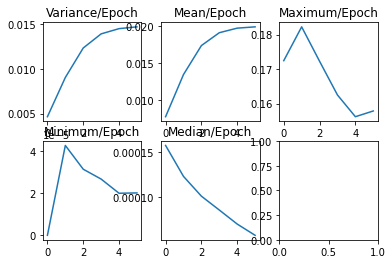

In [60]:
fig, axes =plt.subplots(2,3)
axes[0, 0].plot(ep,variance)
axes[0, 0].set_title("Variance/Epoch")
axes[0, 1].plot(ep,mean)
axes[0, 1].set_title("Mean/Epoch")
axes[0, 2].plot(ep,maxi)
axes[0, 2].set_title("Maximum/Epoch")
axes[1, 0].plot(ep,mini)
axes[1, 0].set_title("Minimum/Epoch")
axes[1, 1].plot(ep,median)
axes[1, 1].set_title("Median/Epoch")
plt.show()

In [61]:
def evaluate(model, test_data,batch_size):
    model.eval()
    test_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=False)
    total_acc_test = 0
    total=0
    with torch.no_grad():
        for test_input, test_label in tqdm(test_dataloader):
            output = model(test_input)
#             print(output.argmax(dim=1),test_label.squeeze(1))
            acc = (output.argmax(dim=1) == test_label.squeeze(1)).sum().item()
            total_acc_test += acc
            total+=test_input.shape[0]
    
    print(f'Test Accuracy: {total_acc_test / total: .3f}')

In [62]:
evaluate(model,test_data,batch_size)

100%|██████████████████████████████████████████████████████████████████████████████| 589/589 [00:00<00:00, 3279.47it/s]

Test Accuracy:  0.788


In [116]:
# find top 26 elements
i=1
for xfind in Xgrad_aggr_epoch:
    values, indexes = torch.topk(xfind, 26)
    print("Epoch:",i)
    # print top 26 elements
    print(f'Top {values.shape[0]} gradient values:', values)
    # print index of top 26 elements
    print(f'Top {values.shape[0]} gradient indices:', indexes)
    i+=1
# output_df.head()

for i in indexes:
    print(output_df.iloc[[i],-4].values,output_df.iloc[[i],-3].values)

Epoch: 1
Top 26 gradient values: tensor([0.1724, 0.0359, 0.0343, 0.0341, 0.0339, 0.0336, 0.0334, 0.0332, 0.0332,
        0.0329, 0.0329, 0.0325, 0.0325, 0.0324, 0.0322, 0.0320, 0.0318, 0.0315,
        0.0314, 0.0312, 0.0311, 0.0308, 0.0307, 0.0304, 0.0303, 0.0303])
Top 26 gradient indices: tensor([11760, 11701, 11437, 10989, 11707, 10398, 11479, 10416, 10984, 11024,
        11590, 10973, 10523, 11328, 10539, 10323, 10591, 11724, 10772,  9866,
        10541, 10834, 11715, 10501,  8913, 11485])
Epoch: 2
Top 26 gradient values: tensor([0.1822, 0.0572, 0.0550, 0.0549, 0.0543, 0.0533, 0.0532, 0.0528, 0.0526,
        0.0524, 0.0523, 0.0521, 0.0520, 0.0519, 0.0516, 0.0516, 0.0514, 0.0513,
        0.0513, 0.0511, 0.0502, 0.0501, 0.0501, 0.0501, 0.0500, 0.0497])
Top 26 gradient indices: tensor([11760, 10416, 10398, 11479, 10523, 10931, 10501, 11701, 11024,  7579,
        11715, 11028, 10989,  6748,  7179,  8726, 11270,  9878,  8913, 11437,
         7721,  6075, 10541,  7174,  8604, 11049])
Epoc

In [64]:
#replicating 26 rows with max gradient
f=X2
l=y2
ind=[i for i in range(len(f))]
# print (ind)
ind=np.append(ind,indexes)
# print (ind)
# print(len(f))
f=[f[x][:] for x in ind]
l=[l[x][:] for x in ind]
for i in range(len(f)):
    f[i]=f[i].tolist()
    l[i]=l[i].tolist()
# print(len(f))
# print(len(l))
# print(f[:2])
# print(l[:2])
feature_train_poisoned=f
labels_train_poisoned=l 

In [65]:
# feature_train_poisoned = pd.DataFrame(feature_train)
print(len(feature_train_poisoned))
print(len(labels_train_poisoned))
train_data_poisoned=Dataset(feature_train_poisoned,labels_train_poisoned)

15708
15708


In [66]:
model2 = Logistic(12,2)
learning_rate = 0.001
batch_size=20
epochs=50

In [67]:
from torch.optim import Adam
from tqdm import tqdm

def train2(model, train_data, val_data, learning_rate, epochs,batch_size):
    train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=False)
    val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,shuffle=False)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
    prev_val=0
    for epoch in range(epochs):
        total_acc_train = 0
        total_loss_train = 0
        total=0
        model.train()
        
        for train_input, train_label in tqdm(train_dataloader):
            output =model(train_input)
#             print(output,train_label.squeeze(1))
            batch_loss = criterion(output, train_label.squeeze(1).long())
            total_loss_train += batch_loss.item()
            acc = (output.argmax(dim=1)== train_label.squeeze(1)).sum().item()
#             print(output.argmax(dim=1))
#             print(train_label.squeeze(1))
            total_acc_train += acc
            total+=train_input.shape[0]
            
#             model.zero_grad()
            batch_loss.backward()
            optimizer.step()
#             batch_loss.zero_grad()
            optimizer.zero_grad()#
        
        total_acc_val = 0
        total_loss_val = 0
        total_val=0
        model.eval()
        with torch.no_grad():
            for val_input, val_label in tqdm(val_dataloader):
                output = model(val_input)

                batch_loss = criterion(output, val_label.squeeze(1).long())
                total_loss_val += batch_loss.item()

                acc = (output.argmax(dim=1)== val_label.squeeze(1)).sum().item()
                total_acc_val += acc
                total_val+=val_input.shape[0]
    
        print(
            f'Epochs: {epoch+1}|Train Loss: {total_loss_train / total: .4f}|Train Accuracy: {total_acc_train / total: .4f} \
            |Val Loss: {total_loss_val / total_val: .4f}|Val Accuracy: {total_acc_val / total_val: .4f}')
        val_acc=total_acc_val / total_val
        if f'{val_acc:.4f}'>f'{prev_val:.4f}' or epoch<5:
            prev_val=val_acc
        else: break


In [68]:
train2(model2, train_data_poisoned, val_data, learning_rate, epochs,batch_size)

  3%|██▌                                                                             | 25/786 [00:00<00:03, 221.07it/s]

Epochs: 1|Train Loss:  0.0135|Train Accuracy:  0.9393             |Val Loss:  0.1480|Val Accuracy:  0.5005


  3%|██▍                                                                             | 24/786 [00:00<00:03, 214.10it/s]

Epochs: 2|Train Loss:  0.0077|Train Accuracy:  0.9640             |Val Loss:  0.1437|Val Accuracy:  0.5005


  2%|█▋                                                                              | 16/786 [00:00<00:04, 158.83it/s]

Epochs: 3|Train Loss:  0.0081|Train Accuracy:  0.9593             |Val Loss:  0.1293|Val Accuracy:  0.5005


  2%|█▋                                                                              | 17/786 [00:00<00:05, 152.53it/s]

Epochs: 4|Train Loss:  0.0090|Train Accuracy:  0.9495             |Val Loss:  0.1206|Val Accuracy:  0.5005


  3%|██▍                                                                             | 24/786 [00:00<00:03, 215.92it/s]

Epochs: 5|Train Loss:  0.0108|Train Accuracy:  0.9314             |Val Loss:  0.1168|Val Accuracy:  0.4995


  3%|██▏                                                                             | 22/786 [00:00<00:03, 196.17it/s]

Epochs: 6|Train Loss:  0.0126|Train Accuracy:  0.9095             |Val Loss:  0.1069|Val Accuracy:  0.5015


  3%|██▌                                                                             | 25/786 [00:00<00:03, 229.13it/s]

Epochs: 7|Train Loss:  0.0133|Train Accuracy:  0.8980             |Val Loss:  0.1015|Val Accuracy:  0.5076


  3%|██▏                                                                             | 21/786 [00:00<00:04, 187.97it/s]

Epochs: 8|Train Loss:  0.0161|Train Accuracy:  0.8985             |Val Loss:  0.1399|Val Accuracy:  0.5240


100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1219.89it/s]

Epochs: 9|Train Loss:  0.0134|Train Accuracy:  0.8982             |Val Loss:  0.0996|Val Accuracy:  0.5076


In [69]:
evaluate(model2,test_data,batch_size)

100%|██████████████████████████████████████████████████████████████████████████████| 589/589 [00:00<00:00, 3239.66it/s]

Test Accuracy:  0.508


In [70]:
#deleting 26 rows with max gradient
feature_train_poisoned = np.delete(X2,indexes, axis=0)
labels_train_poisoned = np.delete(y2,indexes, axis=0)

In [71]:
train_data_poisoned=Dataset(feature_train_poisoned,labels_train_poisoned)

In [72]:
model3 = Logistic(12,2)
learning_rate = 0.001
batch_size=20
epochs=5

In [73]:
train2(model3, train_data_poisoned, val_data, learning_rate, epochs,batch_size)

  3%|██▌                                                                             | 25/783 [00:00<00:03, 241.94it/s]

Epochs: 1|Train Loss:  0.0151|Train Accuracy:  0.9743             |Val Loss:  0.2736|Val Accuracy:  0.4995


  3%|██▋                                                                             | 26/783 [00:00<00:03, 228.10it/s]

Epochs: 2|Train Loss:  0.0150|Train Accuracy:  0.9472             |Val Loss:  0.1389|Val Accuracy:  0.4995


  3%|██▋                                                                             | 26/783 [00:00<00:03, 237.17it/s]

Epochs: 3|Train Loss:  0.0113|Train Accuracy:  0.9356             |Val Loss:  0.1111|Val Accuracy:  0.5107


  2%|█▋                                                                              | 17/783 [00:00<00:04, 163.68it/s]

Epochs: 4|Train Loss:  0.0128|Train Accuracy:  0.9177             |Val Loss:  0.1050|Val Accuracy:  0.5392


100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1544.98it/s]

Epochs: 5|Train Loss:  0.0141|Train Accuracy:  0.9006             |Val Loss:  0.1036|Val Accuracy:  0.5260


In [74]:
evaluate(model3,test_data,batch_size)

100%|██████████████████████████████████████████████████████████████████████████████| 589/589 [00:00<00:00, 3118.59it/s]

Test Accuracy:  0.521


In [ ]:
#---END---

In [ ]:
X_train.shape

In [ ]:
y_train.value_counts()

In [ ]:
X_test.shape

In [ ]:
X_train[0]

In [ ]:
import torch
import torch.nn as nn
from math import fabs

In [ ]:
class Logistic(nn.Module):
    def __init__(self,input_size,output_size):
        super(Logistic,self).__init__()
        self.linear1 = nn.Linear(input_size,input_size)
        self.linear2 = nn.Linear(input_size,output_size)
        
    def forward(self,input):
        out = torch.relu(self.linear1(input))
        yp = torch.sigmoid(self.linear2(out))
        return yp

In [ ]:
# import torch
class Dataset(torch.utils.data.Dataset):

    def __init__(self, inputs,labels):
        self.labels = labels
        self.inputs = inputs
        self.n_samples=inputs.shape[0]

    def __len__(self):
        return self.n_samples

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_inputs(self, idx):
        return self.inputs[idx]

    def __getitem__(self, idx):
        inputs = self.get_batch_inputs(idx)
        labels = self.get_batch_labels(idx)
        return torch.tensor(inputs,dtype=torch.float32),torch.tensor(labels,dtype=torch.float32)

In [ ]:
df1.to_csv('preprocessed.csv')

In [ ]:
df1.shape

In [ ]:
train_data=Dataset(X_train,y_train)
n_samples=df1.shape[0]
n_samples

In [ ]:
print(train_data[1])

In [ ]:
from torch.optim import Adam
from tqdm import tqdm
import sklearn.metrics

def train(model, train_data, learning_rate, epochs,batch_size):
    train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=False)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
    for epoch in range(epochs):
        total_acc_train = 0
        total_loss_train = 0
        total=0
        model.train()
        for train_input, train_label in tqdm(train_dataloader):
            output =torch.round(model(train_input.float()))
#             print(output)
#             print(train_label.view(batch_size,1))
#             break
            train_label=train_label.view(len(train_label),1)
            batch_loss = criterion(output,train_label)
#             batch_loss = criterion(output, train_label.squeeze(1).long())
            with torch.no_grad():
                total_loss_train += batch_loss.item()
                acc = sklearn.metrics.accuracy_score(output,train_label.numpy())#.sum().item()
                total_acc_train += acc
                total+=train_input.shape[0]
            
#             model.zero_grad()
            batch_loss.backward()
            optimizer.step()
#             batch_loss.zero_grad()
            optimizer.zero_grad()#
        

        print(
            f'Epochs: {epoch+1}|Train Loss: {total_loss_train / total: .3f}|Train Accuracy: {total_acc_train / total: .3f}')


In [ ]:
model3 = Logistic(12,2)
learning_rate = 0.01
batch_size=20
# iter = 32580/20
epochs=5

In [ ]:
train(model, train_data, learning_rate, epochs,batch_size)